In [42]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [43]:
#The dataset contains no header for columns, hence the header parameter
dataframe=pd.read_csv('./mitbih_train.csv',header=None)

In [44]:
#Last column is the category column, a scaler value from 0 to 4
y=dataframe[dataframe.columns[-1:]]
x=dataframe[dataframe.columns[:-1]]

In [45]:
# Balances the dataset by oversampling it (it seems like it uses interpolation)
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
oversampler=SMOTE()
x,y=oversampler.fit_resample(x,y)

In [46]:
print(len(y[y[187] ==0 ]))
print(len(y[y[187] ==1 ]))
print(len(y[y[187] ==2 ]))
print(len(y[y[187] ==3 ]))
print(len(y[y[187] ==4 ]))

72471
72471
72471
72471
72471


In [47]:
y=y.to_numpy()

In [48]:
x=x.to_numpy()

In [49]:
x.shape

(362355, 187)

In [50]:
#Change the value to only use a subset of the dataset (like for quick tests...)
x=x[:362355][:][:]
y=y[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x=x.reshape([362355,187,1])

In [51]:
model=tf.keras.Sequential(
    [layers.Conv1D(5, 5, activation='relu', input_shape=(187,1)),
    layers.MaxPool1D(),
    layers.Conv1D(3,3,activation='relu'),
    layers.MaxPool1D(),
    layers.Flatten(),
    layers.Dense(5,activation='softmax')] #softmax cuz categories
)

In [52]:
model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy']) #this was with validation
history=model.fit(x,y,batch_size=10,epochs=2,verbose=True,validation_split=0.2) #Okay but what if leen doesn't allow it, ig it's fine Idk
#

2022-12-28 15:32:34.182456: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 216833232 exceeds 10% of free system memory.


Epoch 1/2
28989/28989 [==============================] - ETA: 0s - loss: 0.8187 - accuracy: 0.6752

2022-12-28 15:34:50.175746: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 54208308 exceeds 10% of free system memory.


28989/28989 [==============================] - 152s 5ms/step - loss: 0.8187 - accuracy: 0.6752 - val_loss: 0.8381 - val_accuracy: 0.7693
Epoch 2/2
28989/28989 [==============================] - 125s 4ms/step - loss: 0.4937 - accuracy: 0.8240 - val_loss: 0.5083 - val_accuracy: 0.8645


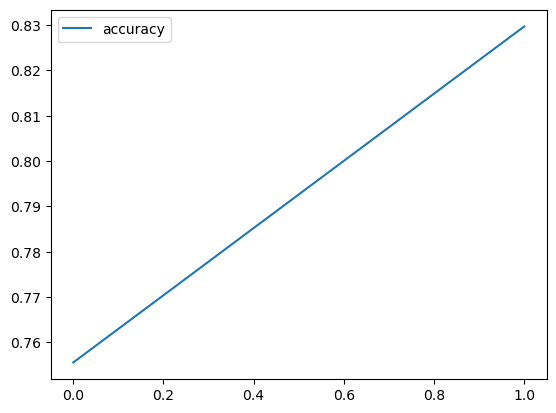

In [53]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(history.epoch, history.history['accuracy'],label='accuracy');
ax.legend()